In [43]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [44]:
liver_df = pd.read_csv("indian_liver_patient.csv")

In [45]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [46]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [47]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [48]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [49]:
liver_df.dropna(axis=0, inplace=True)

In [50]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


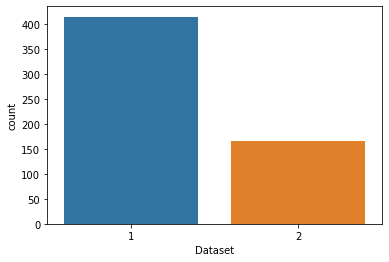

In [51]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  439
Number of patients that are female:  140


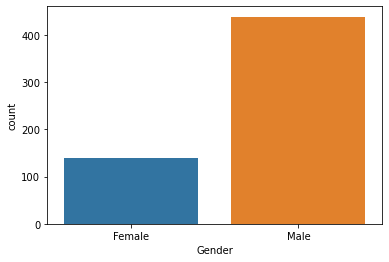

In [52]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [53]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,49
3,2,Male,116
0,1,Female,91
1,1,Male,323


In [54]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.897959
3,2,Male,40.715517
0,1,Female,43.329670
1,1,Male,46.938080


Text(0.5, 0.98, 'Disease by Gender and Age')

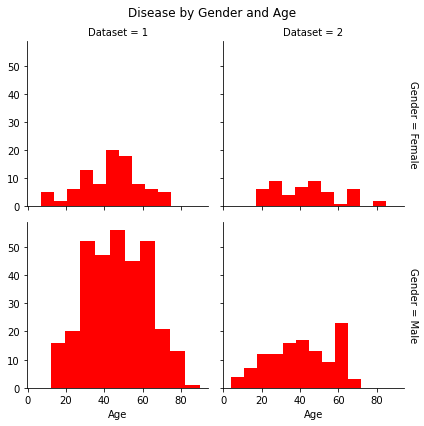

In [55]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

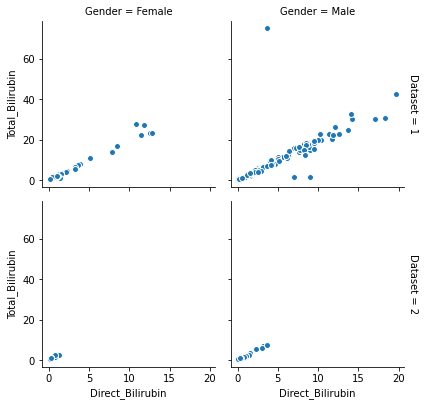

In [56]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\jpolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


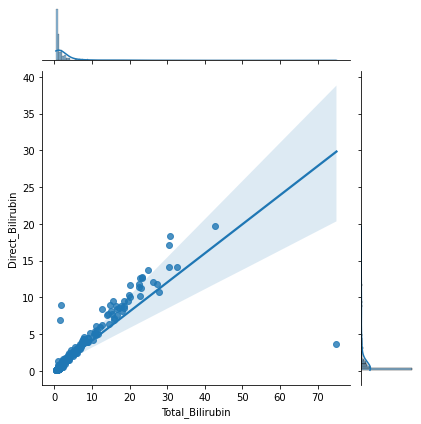

In [57]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

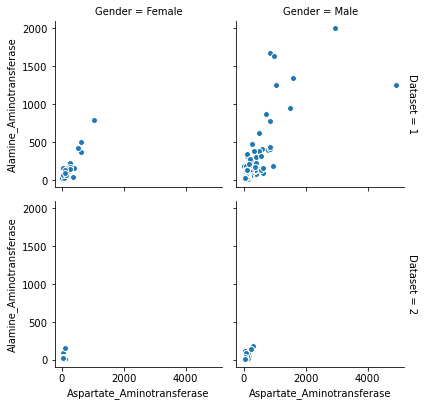

In [58]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\jpolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


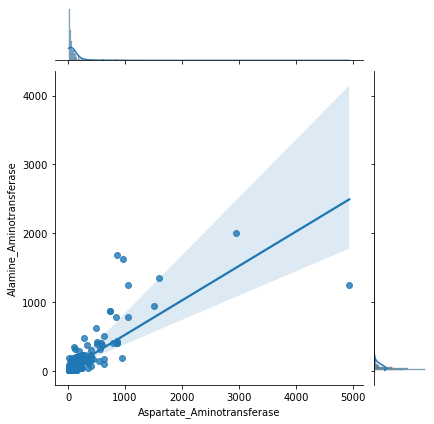

In [59]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

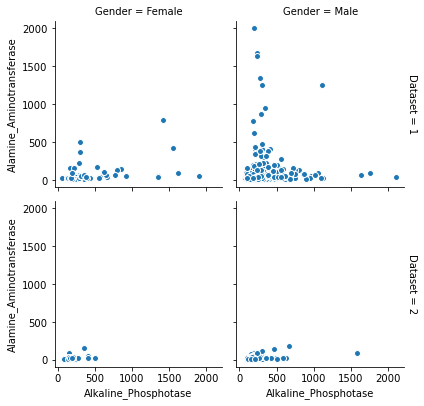

In [60]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\jpolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


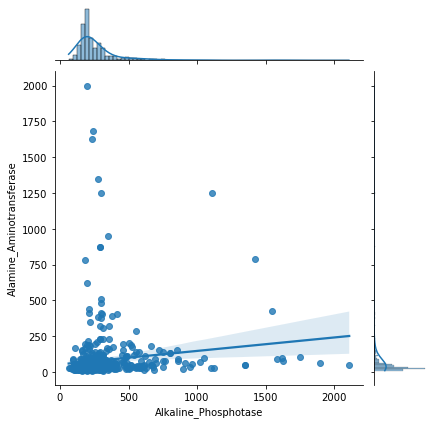

In [61]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

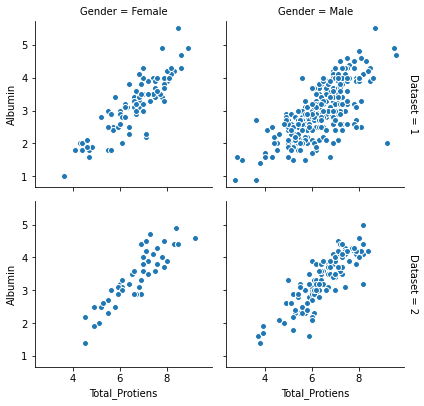

In [62]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\jpolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


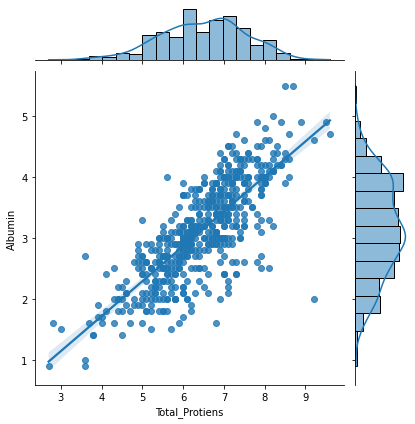

In [63]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

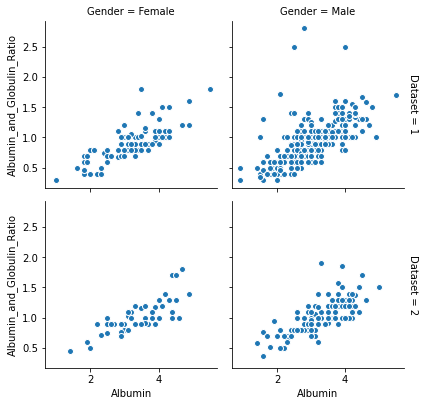

In [64]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\jpolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


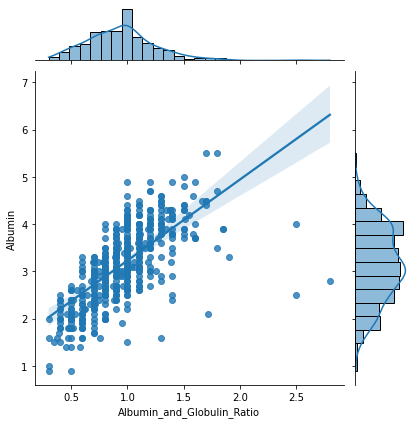

In [65]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

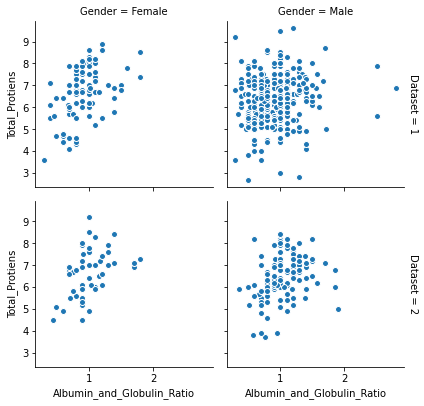

In [66]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)


Observation:

From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin
Aspartate_Aminotransferase & Alamine_Aminotransferase
Total_Protiens & Albumin
Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:
Total_Bilirubin
Alamine_Aminotransferase
Total_Protiens
Albumin_and_Globulin_Ratio
Albumin


In [67]:
pd.get_dummies(liver_df['Gender']).head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [68]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [69]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'])], axis=1)

In [70]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [71]:
X_1 = liver_df.drop(['Gender','Dataset'], axis=1)

In [72]:
y_1 = liver_df['Dataset']

In [74]:
liver_corr = X_1.corr()

In [75]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female,Male
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.055881,0.055881
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.088068,0.088068
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.099160,0.099160
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,0.029368,-0.029368
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.081339,0.081339
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.079421,0.079421
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.095149,-0.095149
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.095579,-0.095579
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.003424,-0.003424
Female,-0.055881,-0.088068,-0.099160,0.029368,-0.081339,-0.079421,0.095149,0.095579,0.003424,1.000000,-1.000000


Text(0.5, 1.0, 'Correlation between features')

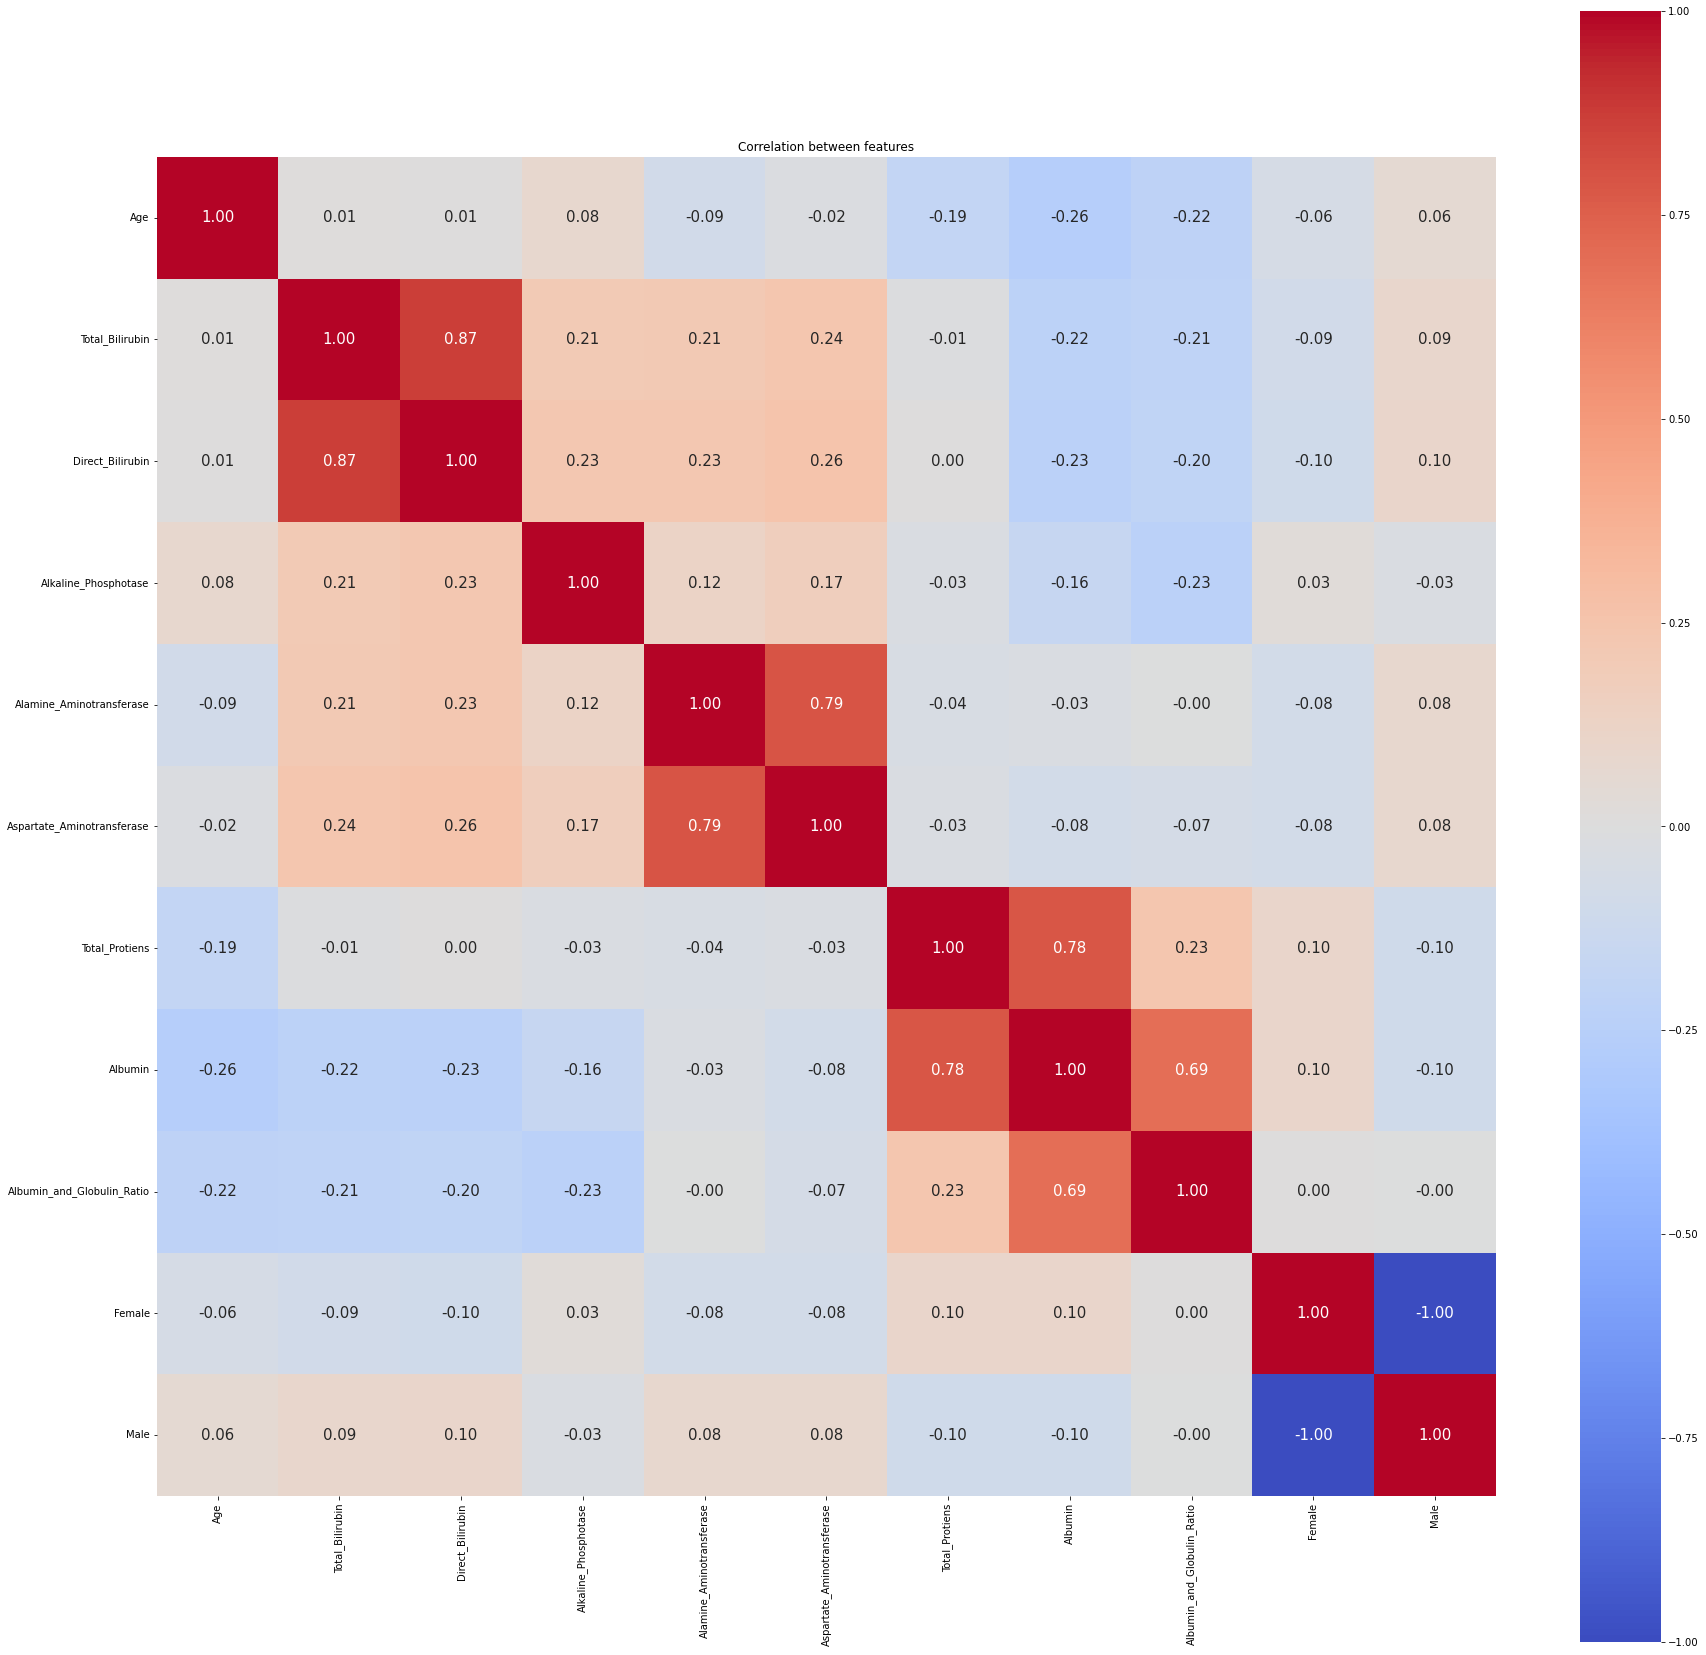

In [76]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

In [77]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(463, 11)
(463,)
(116, 11)
(116,)


Logistic Regression Training Score: 
 74.73
Logistic Regression Test Score: 
 65.52
Coefficient: 
 [[-1.86985295e-02 -8.80157651e-03 -3.62675824e-01 -1.23024911e-03
  -1.21694956e-02 -3.37212029e-03 -4.39622383e-01  6.24154252e-01
  -3.21150687e-01  3.73635945e-04  5.77032549e-02]]
Intercept: 
 [2.2774648]
Accuracy: 
 0.6551724137931034
Confusion Matrix: 
 [[70  3]
 [37  6]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.96      0.78        73
           2       0.67      0.14      0.23        43

    accuracy                           0.66       116
   macro avg       0.66      0.55      0.50       116
weighted avg       0.66      0.66      0.58       116



C:\Users\jpolo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

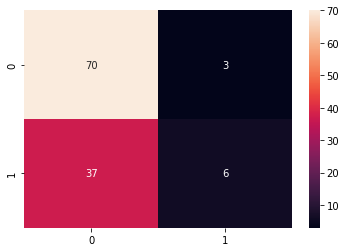

In [88]:
logreg = LogisticRegression(max_iter=1000)
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [89]:
coeff_df = pd.DataFrame(X_1.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Albumin,0.624154
10,Male,0.057703
9,Female,0.000374
3,Alkaline_Phosphotase,-0.001230
5,Aspartate_Aminotransferase,-0.003372
1,Total_Bilirubin,-0.008802
4,Alamine_Aminotransferase,-0.012169
0,Age,-0.018699
8,Albumin_and_Globulin_Ratio,-0.321151
2,Direct_Bilirubin,-0.362676


Gaussian Score: 
 53.78
Gaussian Test Score: 
 58.62
Accuracy: 
 0.5862068965517241
[[27 46]
 [ 2 41]]
              precision    recall  f1-score   support

           1       0.93      0.37      0.53        73
           2       0.47      0.95      0.63        43

    accuracy                           0.59       116
   macro avg       0.70      0.66      0.58       116
weighted avg       0.76      0.59      0.57       116



<AxesSubplot:>

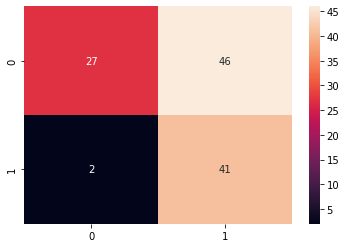

In [90]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [91]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 62.07
Accuracy: 
 0.6206896551724138
[[64  9]
 [35  8]]
              precision    recall  f1-score   support

           1       0.65      0.88      0.74        73
           2       0.47      0.19      0.27        43

    accuracy                           0.62       116
   macro avg       0.56      0.53      0.51       116
weighted avg       0.58      0.62      0.57       116



In [92]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,74.73,65.52
2,Random Forest,100.00,62.07
1,Gaussian Naive Bayes,53.78,58.62


In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
ss=StandardScaler()

In [98]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

Logistic Regression Training Score: 
 75.38
Logistic Regression Test Score: 
 65.52
Coefficient: 
 [[-0.27910147 -0.32241514 -0.79274157 -0.33059323 -1.41919606 -0.96133108
  -0.65279024  0.7464945  -0.26153818 -0.00253524  0.00253524]]
Intercept: 
 [-1.85168101]
Accuracy: 
 0.6551724137931034
Confusion Matrix: 
 [[72  1]
 [39  4]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



<AxesSubplot:>

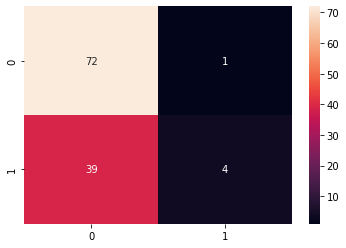

In [99]:
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train_scaled, y_train)
#Predict Output
log_predicted= logreg.predict(X_test_scaled)

logreg_score = round(logreg.score(X_train_scaled, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test_scaled, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

Gaussian Score: 
 53.78
Gaussian Test Score: 
 58.62
Accuracy: 
 0.5862068965517241
[[27 46]
 [ 2 41]]
              precision    recall  f1-score   support

           1       0.93      0.37      0.53        73
           2       0.47      0.95      0.63        43

    accuracy                           0.59       116
   macro avg       0.70      0.66      0.58       116
weighted avg       0.76      0.59      0.57       116



<AxesSubplot:>

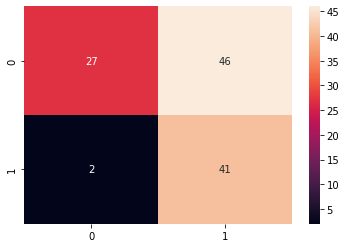

In [100]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_scaled, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test_scaled)

gauss_score = round(gaussian.score(X_train_scaled, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test_scaled, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [101]:
# Random Forest no need to scale but gonna try it anyway

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test_scaled)

random_forest_score = round(random_forest.score(X_train_scaled, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test_scaled, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 62.07
Accuracy: 
 0.6206896551724138
[[65  8]
 [36  7]]
              precision    recall  f1-score   support

           1       0.64      0.89      0.75        73
           2       0.47      0.16      0.24        43

    accuracy                           0.62       116
   macro avg       0.56      0.53      0.49       116
weighted avg       0.58      0.62      0.56       116



In [102]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,75.38,65.52
2,Random Forest,100.00,62.07
1,Gaussian Naive Bayes,53.78,58.62


In [105]:
####### New run to handle imbalances
df=liver_df

In [106]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Dataset"].values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Dataset", "Gender"], axis=1) 

from keras.utils import normalize
X = normalize(X, axis=1)

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [113]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model_RF.fit(X_train, y_train)

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Albumin_and_Globulin_Ratio    0.121705
Albumin                       0.120935
Total_Protiens                0.102310
Direct_Bilirubin              0.102114
Aspartate_Aminotransferase    0.090206
Age                           0.089757
Male                          0.086860
Alkaline_Phosphotase          0.083800
Alamine_Aminotransferase      0.080525
Total_Bilirubin               0.077754
Female                        0.044035
dtype: float64


In [114]:
#Test prediction on testing data. 
prediction_test_RF = model_RF.predict(X_test)

In [115]:
#ACCURACY METRICS
print("********* METRICS FOR IMBALANCED DATA *********")
#Let us check the accuracy on test data
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test_RF))


(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print(unique, counts)

********* METRICS FOR IMBALANCED DATA *********
Accuracy =  0.6637931034482759
[1 2] [100  16]


In [116]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print(cm)

#Print individual accuracy values for each class, based on the confusion matrix
print("With Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("No disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

[[67  6]
 [33 10]]
With Lung disease =  0.67
No disease =  0.625


In [117]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

print("ROC_AUC score for imbalanced data is:")
print(roc_auc_score(y_test, prediction_test_RF))


ROC_AUC score for imbalanced data is:
0.5751831793564829


In [120]:
from sklearn.utils import resample
print(df['Dataset'].value_counts())

1    414
2    165
Name: Dataset, dtype: int64


In [121]:
#Separate majority and minority classes
df_majority = df[df['Dataset'] == 1]
df_minority = df[df['Dataset'] == 2]

In [122]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match average class
                                 random_state=42)

In [124]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['Dataset'].value_counts())

2    416
1    414
Name: Dataset, dtype: int64


In [126]:
Y_upsampled = df_upsampled["Dataset"].values

#Define the independent variables
X_upsampled = df_upsampled.drop(labels = ["Dataset", "Gender"], axis=1) 
X_upsampled = normalize(X_upsampled, axis=1)

In [127]:
from sklearn.model_selection import train_test_split
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, 
                                                                                            Y_upsampled, 
                                                                                            test_size=0.2, 
                                                                                            random_state=20)

In [128]:
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test_upsampled)

In [129]:
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_RF_upsampled))

cm_upsampled = confusion_matrix(y_test_upsampled, prediction_test_RF_upsampled)
print(cm_upsampled)

print("With Lung disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0]))
print("No lung disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1]))


print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, prediction_test_RF_upsampled))

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
Accuracy =  0.8734939759036144
[[69 13]
 [ 8 76]]
With Lung disease =  =  0.8961038961038961
No lung disease =  0.8539325842696629
ROC_AUC score for balanced data using upsampling is:
0.8731126596980255
